# Project 2 Churn Analysis
## Francis Yang - 12/5/2022

This project is about a very common business problem: analyzing customer churn. In this project, using *supervised learning models*, you will identify cell phone service customers who are more likely to stop using the service in the future and create a model that can predict if a certain customer will drop the service.<br> <br>
Furthermore, it would help to analyze the top factors that influence user retention to guide the company prevent user churn. The dataset contains the information of customers' plans and usage of the service, as well as whether or not they stopped using the service eventually. You may find solutions to very similar data science problems on many different platforms. It is important that you put all your effort to get to a working solution yourself.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import ipywidgets as widgets

from plotly.offline import init_notebook_mode
import plotly as py
import plotly.graph_objects as go


init_notebook_mode(connected=True)

data = pd.read_csv("datasets/churn.csv")

In [2]:
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   o

Correct predictor data type

In [4]:
cmap = {" False.":False, " True.":True}
data['churned'] = data['churned'].replace(cmap)

Correct NaN values and data type

In [5]:
data['total_eve_charge'] = data['total_eve_charge'].replace({'?':np.nan})
data['total_eve_charge'] = data['total_eve_charge'].astype(float)
data['intl_plan'] = data['intl_plan'].astype('category')
data['voice_mail_plan'] = data['voice_mail_plan'].astype('category')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          5000 non-null   object  
 1   account_length                 5000 non-null   int64   
 2   area_code                      5000 non-null   int64   
 3   phone_number                   5000 non-null   object  
 4   intl_plan                      5000 non-null   category
 5   voice_mail_plan                5000 non-null   category
 6   number_vmail_messages          5000 non-null   int64   
 7   total_day_minutes              5000 non-null   float64 
 8   total_day_calls                5000 non-null   int64   
 9   total_day_charge               5000 non-null   float64 
 10  total_eve_minutes              5000 non-null   float64 
 11  total_eve_calls                5000 non-null   int64   
 12  total_eve_charge               499

## Visualization

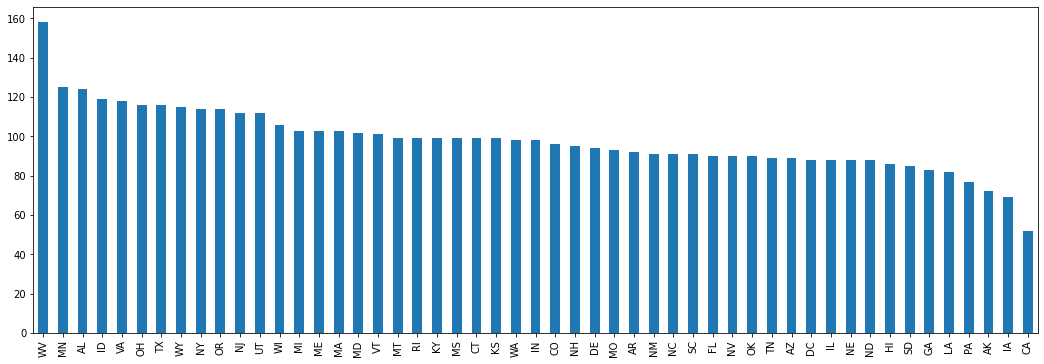

In [7]:
data['state'].value_counts().plot(kind='bar',figsize=(18,6));

Somewhat uniform distribution of samples

In [8]:
data['state'].value_counts().shape

(51,)

Washington DC has its own data.
### Categorical

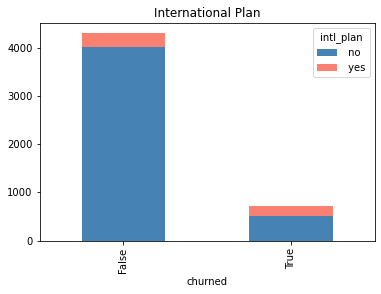

In [9]:
data.groupby(['churned', 'intl_plan']).size().unstack().plot(kind='bar', stacked=True,
                                                             color=['steelblue', 'salmon'], title='International Plan');

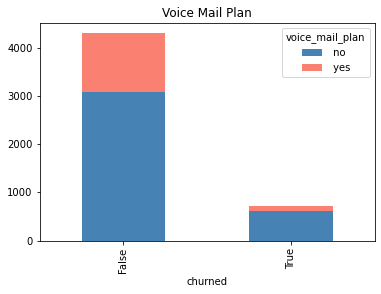

In [10]:
data.groupby(['churned', 'voice_mail_plan']).size().unstack().plot(kind='bar', stacked=True,
                                                                   color=['steelblue', 'salmon'], title='Voice Mail Plan');

Having an international calling plan or voicemail plan is not a strong indicator of churn alone.

### Column Means grouped by State and Area
Group means represented below. Some columns will not make sense like phone number and categorical columns, and are removed automatically.

In [11]:
state_area_gc = data.groupby(by=['state','area_code','churned'])
state_gc = data.groupby(by=['state','churned'])

In [12]:
state_means = state_gc.mean()
state_area_means = state_area_gc.mean()
state_area_means.head()

account_length  number_vmail_messages  \
state area_code churned                                          
AK    408       False         83.800000              11.666667   
      415       False        100.676471              12.852941   
                True         112.500000               4.750000   
      510       False        103.722222               2.666667   
                True         152.000000               0.000000   

                         total_day_minutes  total_day_calls  total_day_charge  \
state area_code churned                                                         
AK    408       False           172.906667        97.600000         29.394667   
      415       False           190.905882       103.529412         32.454412   
                True            162.900000        91.500000         27.692500   
      510       False           166.122222        93.000000         28.241111   
                True            302.800000       143.000000         51.480000   

                         total_eve_minutes  total_eve_calls  total_eve_charge  \
state area_code churned                                                         
AK    408       False           169.940000        98.933333         14.445333   
      415       False           192.197059        99.558824         16.336471   
                True            173.125000       102.500000         14.715000   
      510       False           205.061111        98.833333         17.430000   
                True            189.800000        69.000000         16.130000   

                         total_night_minutes  total_night_calls  \
state area_code churned                                           
AK    408       False             178.946667          99.466667   
      415       False             197.773529         100.676471   
                True              202.300000          89.500000   
      510       False             211.894444          97.166667   
                True              214.900000         114.000000   

                         total_night_charge  total_intl_minutes  \
state area_code churned                                           
AK    408       False              8.052000            9.880000   
      415       False              8.899412            9.438235   
                True               9.107500           10.400000   
      510       False              9.535000           10.550000   
                True               9.670000           10.900000   

                         total_intl_calls  total_intl_charge  \
state area_code churned                                        
AK    408       False            4.000000           2.669333   
      415       False            5.147059           2.549118   
                True             1.750000           2.807500   
      510       False            4.944444           2.848333   
                True             4.000000           2.940000   

                         number_customer_service_calls  
state area_code churned                                 
AK    408       False                         1.133333  
      415       False                         1.264706  
                True                          2.750000  
      510       False                         1.722222  
                True                          2.000000

There are only 3 area codes, also each state has the same area code. This is not real because there are states with only 1 area code in real life.
### Existing Customers

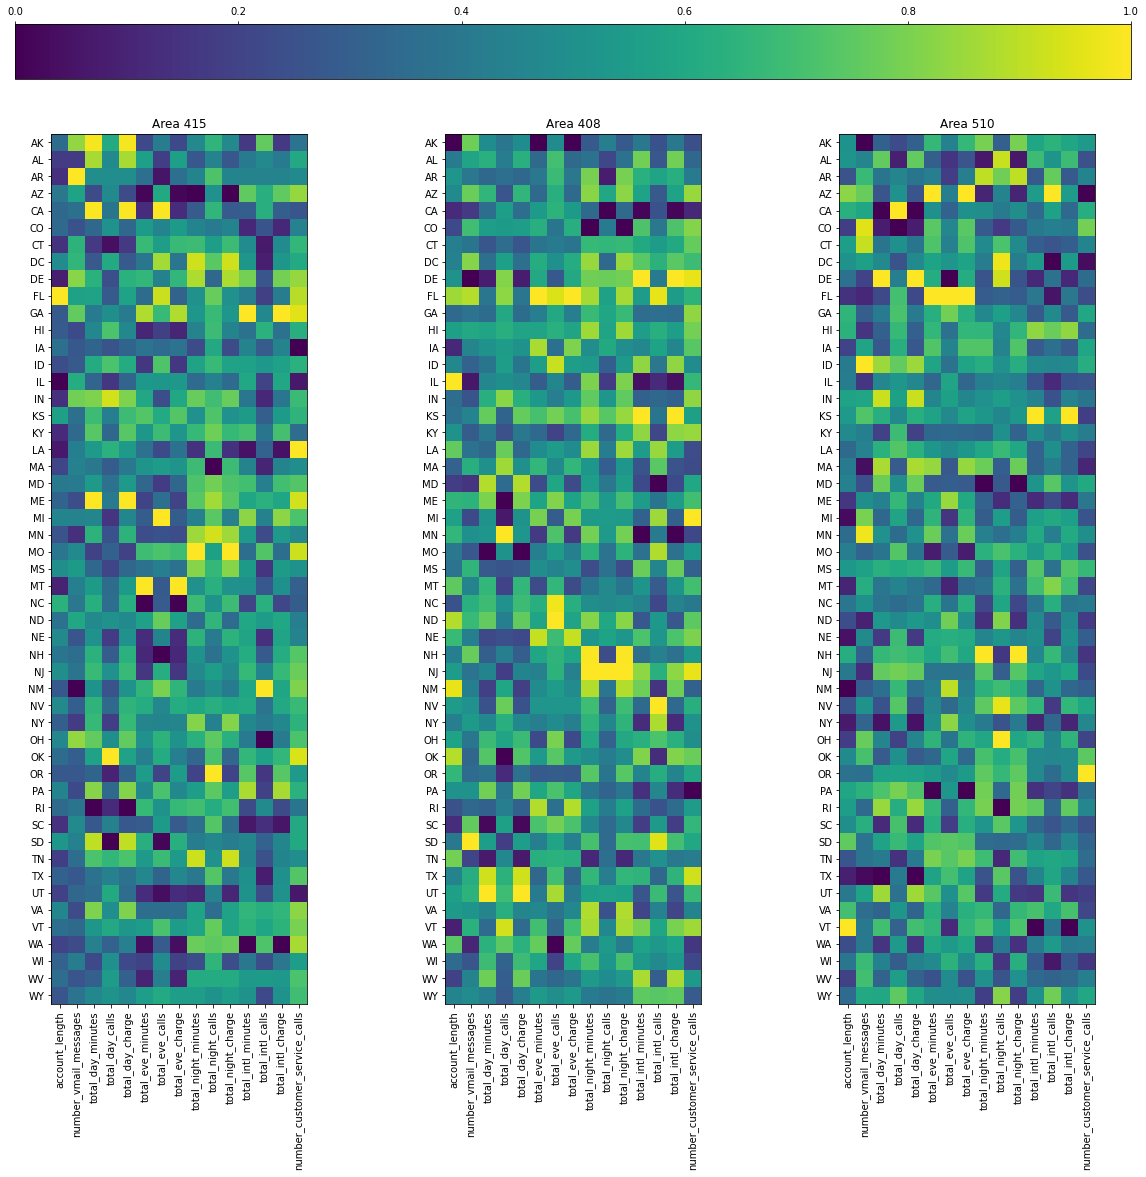

In [13]:
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(1, 3, figsize=(20, 20))
codes = ['415', '408', '510']
for i, ax in enumerate(axs.ravel()):
    col_data = state_area_means.filter(like='False', axis=0).filter(
        like=codes[i], axis=0).reset_index((1, 2)).drop(['area_code', 'churned'], axis=1)

    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(col_data.values)
    s_col_data = pd.DataFrame(
        x_scaled, columns=state_area_means.columns, index=col_data.index)

    ax.imshow(s_col_data, cmap='viridis')
    ax.set_title(f'Area {codes[i]}')
    ax.set_xticks(np.arange(15), labels=col_data.columns, rotation='vertical')
    ax.set_yticks(np.arange(col_data.shape[0]), labels=col_data.index)
plt.colorbar(axs[0].images[0], ax=axs, location='top');

Account lengths are generally low for each state and area of existing customers. 
### Churn group

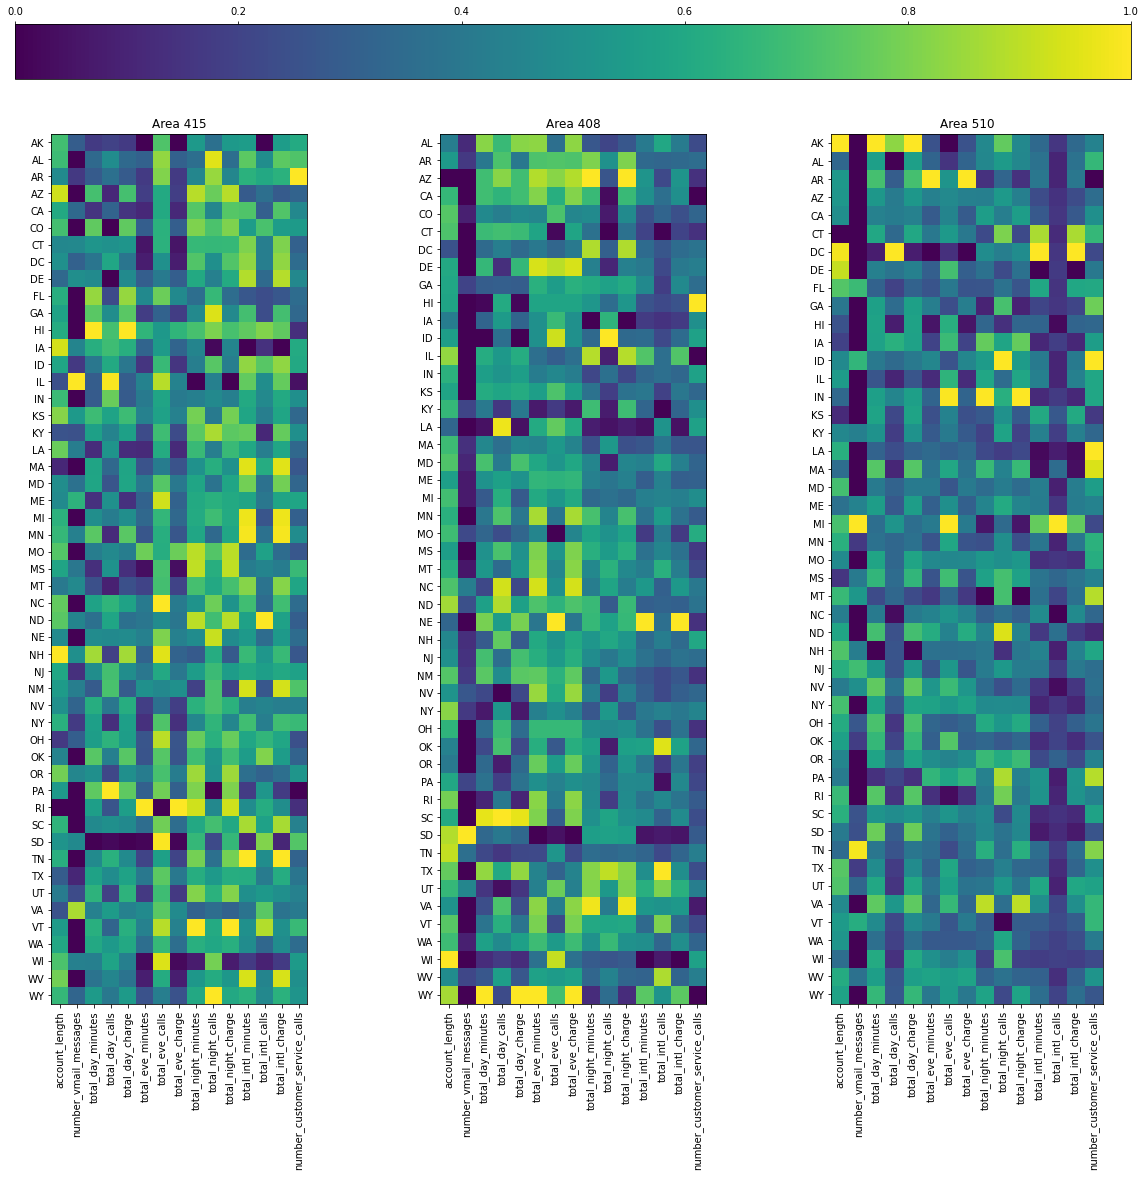

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20))
codes = ['415', '408', '510']
for i, ax in enumerate(axs.ravel()):
    col_data = state_area_means.filter(like='True', axis=0).filter(
        like=codes[i], axis=0).reset_index((1, 2)).drop(['area_code', 'churned'], axis=1)

    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(col_data.values)
    s_col_data = pd.DataFrame(
        x_scaled, columns=state_area_means.columns, index=col_data.index)

    ax.imshow(s_col_data, cmap='viridis')
    ax.set_title(f'Area {codes[i]}')
    ax.set_xticks(np.arange(15), labels=col_data.columns, rotation='vertical')
    ax.set_yticks(np.arange(col_data.shape[0]), labels=col_data.index)
plt.colorbar(axs[0].images[0], ax=axs, location='top');

Looking along the columns of area 408, there is a strong absence in `number_vmail_messages`. This is the easiest commonality to see, but with dimension reduction, like PCA, we can find more columns that have a strong indicator of churn. 

### Proportional Difference 
The following heatmap indicates which value is higher between existing customer and churn groups. If is is gray then the proportion is similar. Remeber these are proportions of the column means.


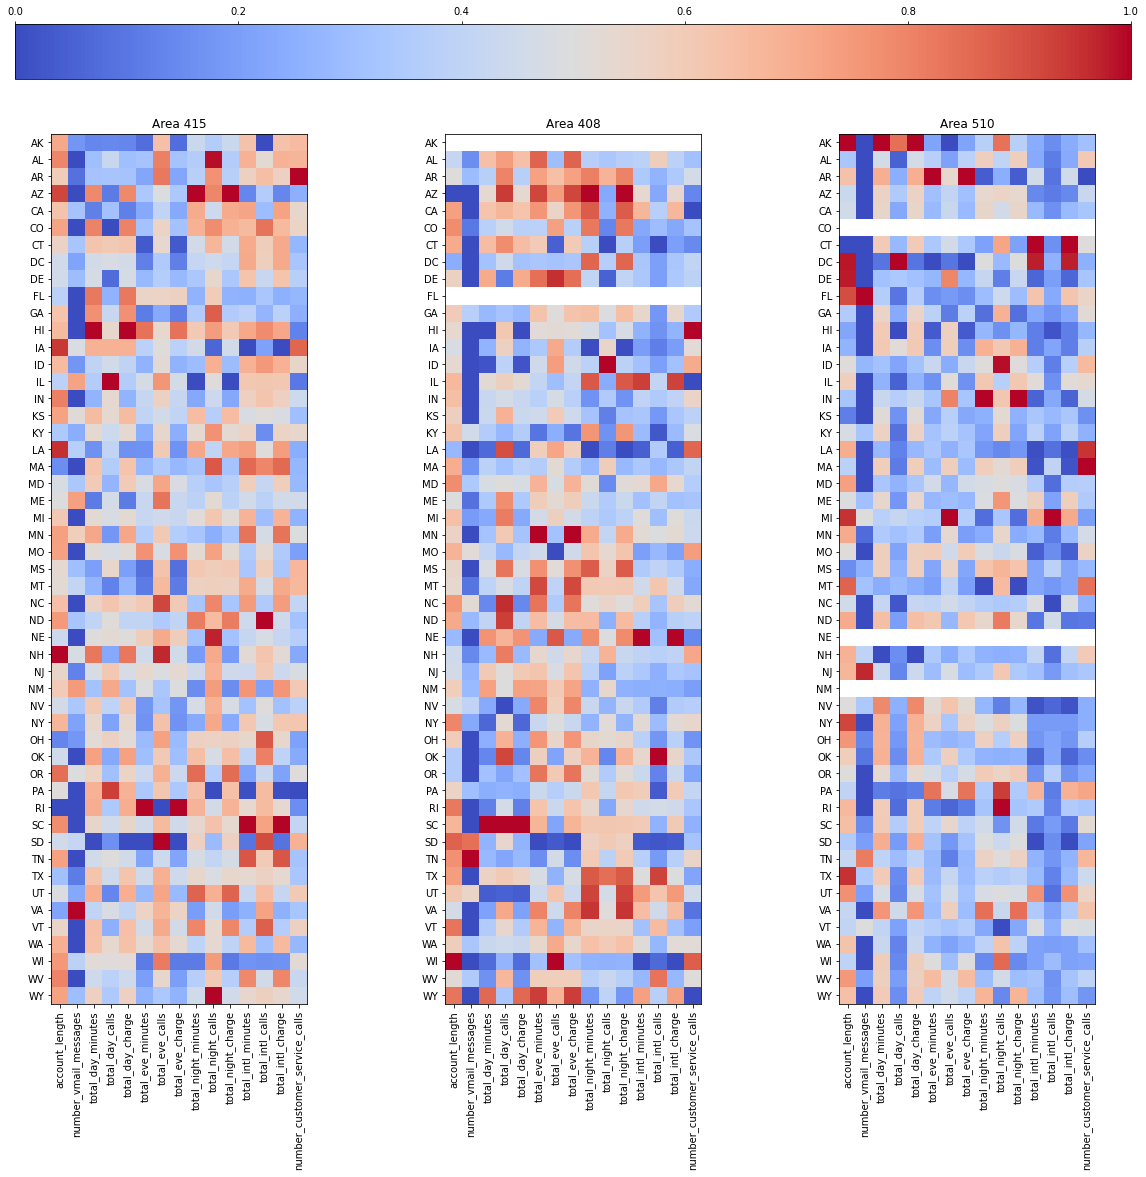

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20))
# coolwarm cmap
codes = ['415', '408', '510']
for i, ax in enumerate(axs.ravel()):
    churn = state_area_means.filter(like='True', axis=0).filter(like=codes[i], axis=0).reset_index(
        (1, 2)).drop(['area_code', 'churned'], axis=1)

    xist = state_area_means.filter(like='False', axis=0).filter(like=codes[i], axis=0).reset_index(
        (1, 2)).drop(['area_code', 'churned'], axis=1)

    propr = churn.div(xist, axis=0) #churn/xist

    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(propr.values)
    s_col_data = pd.DataFrame(
        x_scaled, columns=state_area_means.columns, index=propr.index)

    ax.imshow(s_col_data, cmap='coolwarm')
    ax.set_title(f'Area {codes[i]}')
    ax.set_xticks(np.arange(15), labels=propr.columns, rotation='vertical')
    ax.set_yticks(np.arange(propr.shape[0]), labels=propr.index)
plt.colorbar(axs[0].images[0], ax=axs, location='top');

Red means the churn customers had a higher value. Blue means the existing customers had a higher value. Completely white rows means data was absent in churn or existing customer group.
## Other visualizations

In [16]:
# Interactive Heatmap
locs, l2 = zip(*state_means.loc(axis=0)
               [pd.IndexSlice[:, False]]['account_length'].index)

col_labels = [x.replace('_', ' ').title() for x in state_area_means.columns]
titles = dict(zip(state_area_means.columns, col_labels))

f = go.FigureWidget([go.Choropleth(
    locations=locs,  # Spatial coordinates
    z=state_means.loc(axis=0)[pd.IndexSlice[:, False]
                              ]['account_length'],  # Data to be color-coded
    locationmode='USA-states',  # set of locations match entries in `locations`
    colorscale='Reds',
    colorbar_title="Amount")])
f.layout.geo.scope = 'usa'
f.layout.title = "Average Account Length By State"


def update_axes(column, churn):
    geo = f.data[0]
    locs, l2 = zip(*state_means.loc(axis=0)
                   [pd.IndexSlice[:, churn]][column].index)
    geo.locations = locs
    geo.z = state_means.loc(axis=0)[pd.IndexSlice[:, churn]][column]
    f.layout.title = f"Average {titles[column]} By State"


axis_dropdowns = widgets.interactive(
    update_axes, column=state_means.columns, churn=[False, True])

widgets.VBox((widgets.HBox(axis_dropdowns.children), f))

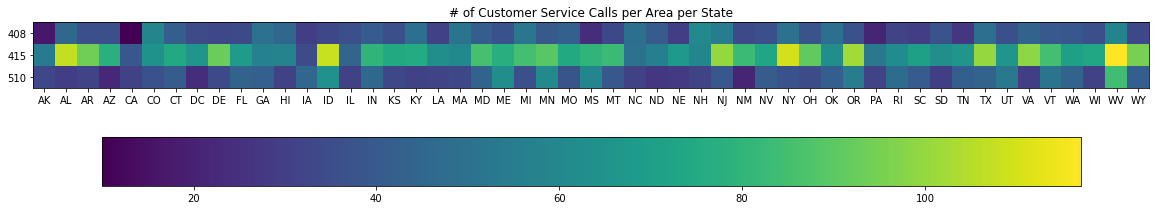

In [17]:
#Combined churned and not churned
table = pd.pivot_table(data, values='number_customer_service_calls', index=['state'],columns=['area_code'], aggfunc=np.sum)

fig, ax = plt.subplots(figsize=(20,6))
plt.imshow(table.T,cmap='viridis')
plt.colorbar(orientation='horizontal')
ax.set_xticks(np.arange(51), labels=table.index)
ax.set_yticks(np.arange(3), labels=table.columns)
ax.set_title("# of Customer Service Calls per Area per State")
plt.show()

## Data Prep for Modeling

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:19].values
y = data['churned'].values

labelencoder_X_1 = LabelEncoder()
X[:, 4] = labelencoder_X_1.fit_transform(X[:, 3])  # intl_plan

labelencoder_X_2 = LabelEncoder()
X[:, 5] = labelencoder_X_2.fit_transform(X[:, 4])  # voice_mail_column

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)  # churn

# OneHotEncoding with pandas

X = pd.DataFrame(X)  # Converting X to a dataframe

# Dropping the 'State' & 'phone_number' columns from X
X = X.drop([0, 3], axis=1)

# Convert states to columns
X_State = pd.get_dummies(data.iloc[:, 0], drop_first=True)
X_final = pd.concat([X, X_State], axis=1, ignore_index=True)  # Append columns

X_train, X_test, y_train, y_test = train_test_split(X_final, y, random_state=6)

In [19]:
fig = go.Figure(data=go.Heatmap(
                    z=data.corr(),
                    x=data.corr().columns,
                    y=data.corr().index
))
fig.show()

Weak correlation across all columns. Suggests the data is not linearly separable.

## Modeling
### PCA + Logistic Regression

In [20]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# With PCA level 10
n_components = 10
pipe = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=n_components)),
                ('model', LogisticRegression(C=1000, max_iter=50000))
                 ])

# No PCA
pipe2 = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                  ('scaler', StandardScaler()),
                  ('model', LogisticRegression(C=1000, max_iter=50000))
                  ])

pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)*100
pipe2.fit(X_train, y_train)
accuracy2 = pipe2.score(X_test, y_test)*100

print(f'PCA Model Accuracy: {accuracy}%')
print(f'Plain Model Accuracy: {accuracy2:.2f}%')

PCA Model Accuracy: 85.44%
Plain Model Accuracy: 86.80%


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators": [50, 100, 250],
    "max_depth": [4, 8, 16, 32, None]
}
pipe3 = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                  ('grid', GridSearchCV(RandomForestClassifier(random_state=3), parameters, cv=5))
                  ])

pipe3.fit(X_train, y_train)
grid = pipe3['grid']
print(f'Best parameters are: {grid.best_params_}')
print("\n")
mean_score = grid.cv_results_['mean_test_score']
std_score = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, std, params in zip(mean_score, std_score, params):
    print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

Best parameters are: {'max_depth': None, 'n_estimators': 100}


0.874 + or -0.007 for the {'max_depth': 4, 'n_estimators': 50}
0.872 + or -0.004 for the {'max_depth': 4, 'n_estimators': 100}
0.873 + or -0.005 for the {'max_depth': 4, 'n_estimators': 250}
0.893 + or -0.005 for the {'max_depth': 8, 'n_estimators': 50}
0.893 + or -0.004 for the {'max_depth': 8, 'n_estimators': 100}
0.893 + or -0.005 for the {'max_depth': 8, 'n_estimators': 250}
0.897 + or -0.004 for the {'max_depth': 16, 'n_estimators': 50}
0.897 + or -0.005 for the {'max_depth': 16, 'n_estimators': 100}
0.898 + or -0.005 for the {'max_depth': 16, 'n_estimators': 250}
0.898 + or -0.003 for the {'max_depth': 32, 'n_estimators': 50}
0.899 + or -0.004 for the {'max_depth': 32, 'n_estimators': 100}
0.897 + or -0.005 for the {'max_depth': 32, 'n_estimators': 250}
0.898 + or -0.004 for the {'max_depth': None, 'n_estimators': 50}
0.899 + or -0.003 for the {'max_depth': None, 'n_estimators': 100}
0.898 + or -0.005 for the {'max_d

### Gradient Boosting


In [22]:
from sklearn.ensemble import GradientBoostingClassifier

pipe4 = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                  ('model', GradientBoostingClassifier(n_estimators=100, validation_fraction=0.2,
                                                       n_iter_no_change=5, tol=0.01, random_state=0))
                  ])

pipe4.fit(X_train, y_train)
accuracy4 = pipe4.score(X_test, y_test)*100
print(f'GB Model Accuracy: {accuracy4}%')

GB Model Accuracy: 88.72%


In [23]:
gb = pipe4['model']
gb.n_estimators_

22

## Conclusion
The best model I could develop is a Random Forest Classifier. The parameters of the model are the default parameters of 100 estimators and no max depth. The train accuracy is 89%

In [29]:
bp = grid.best_params_
best_model = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                       ('model', RandomForestClassifier(random_state=3, **bp))
                       ])
best_model.fit(X_train, y_train)

accuracy5 = best_model.score(X_test, y_test)*100
print(f'Best Model Test Accuracy: {accuracy5}%')

Best Model Test Accuracy: 89.60000000000001%


Test accuracy is very similar to train at 89.6%